# Handwritten Digit Recognition

The MNIST dataset is a database of handwritten digits. It contains 60,000 training images and 10,000 testing images. This is a perfect dataset to start implementing image classification where you can classify a digit from 0 to 9.

Implement a machine learning classification algorithm on image to recognize handwritten digits from a paper.

## Neural Network Input

In [24]:
import torch
import torchvision
from torchvision import transforms, datasets

In [25]:
# Load data and transform to tensors
train = datasets.MNIST("", train=True, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, 
                      transform=transforms.Compose([transforms.ToTensor()]))

In [26]:
trainset = torch.utils.data.DataLoader(train, batch_size=10,
                                       shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10,
                                      shuffle=True)

In [27]:
# Examine data from first batch
for data in trainset:
    print(data)
    break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

In [28]:
# Extract first sample from first batch
x, y = data[0][0], data[1][0]

In [29]:
x.shape

torch.Size([1, 28, 28])

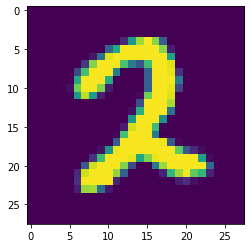

In [30]:
# View image
import matplotlib.pyplot as plt

plt.imshow(x.view(28,28)) # x.shape returns torch.Size([1, 28, 28]) hence we need to reshape using view()

### Check distribution of data

In [31]:
num_count = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
total_count = 0

for batch in trainset:
    x, y = batch
    for label in y:
        # Use the item() function to obtain value of tensor, could alternatively cast as int()
        num_count[label.item()] += 1
        total_count += 1

In [32]:
for key in num_count:
    print(f"Percentage of {key}s: {(num_count[key] * 100 / total_count):6.2f}%")

Percentage of 0s:   9.87%
Percentage of 1s:  11.24%
Percentage of 2s:   9.93%
Percentage of 3s:  10.22%
Percentage of 4s:   9.74%
Percentage of 5s:   9.04%
Percentage of 6s:   9.86%
Percentage of 7s:  10.44%
Percentage of 8s:   9.75%
Percentage of 9s:   9.91%


## Create Neural Network

In [33]:
import torch.nn as nn
import torch.nn.functional as F

In [34]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) # Use log_softmax for multi-class classification
    
net = Net()

## Train Neural Network

In [35]:
import torch.optim as optim

# Use Adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.0005)

In [36]:
for epoch in range(3): # Iterate 3 times over the data
    for data in trainset: # Iterate over batches in the training set
        X, y = data # X is array of features, y is the array of labels
        net.zero_grad() # Sets gradients to 0 before calculating loss every time
        output = net(X.view(-1, 28*28)) # Pass in the reshaped input image
        loss = F.nll_loss(output, y) # Calculate loss
        loss.backward() # Back-propogate loss through the neural network's parameters
        optimizer.step() # Optimize weights based on loss
    print(loss) # Print loss

tensor(0.7714, grad_fn=<NllLossBackward>)
tensor(0.2607, grad_fn=<NllLossBackward>)
tensor(0.0045, grad_fn=<NllLossBackward>)


## Calculate accuracy

In [37]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.971


### Check accuracy on single image

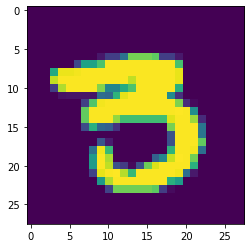

In [50]:
plt.imshow(X[5].view(28,28))
plt.show()

In [51]:
print(torch.argmax(net(X[5].view(-1,784))[0]))

tensor(3)
